ITDS: CHAPTER 6. RANDOM VARIABLE GENERATION - Exercises

Accept - Reject Algorithm

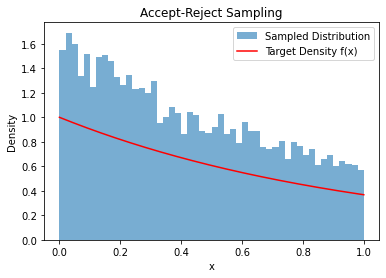

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def accept_reject_sampler(f, g, M, sample_g, n_samples):
    """
    Accept-Reject Sampler

    Parameters:
    - f: function, the target density (not normalized).
    - g: function, the proposal density (not normalized).
    - M: float, the constant satisfying f(x) <= M * g(x).
    - sample_g: function, a function to generate samples from g(x).
    - n_samples: int, the desired number of samples.

    Returns:
    - samples: list, samples distributed according to f(x).
    """
    samples = []
    while len(samples) < n_samples:
        # Generate proposal sample x ~ g(x)
        x = sample_g()
        
        # Compute acceptance ratio r(x)
        r = f(x) / (M * g(x))
        
        # Generate U ~ Uniform(0, 1)
        U = np.random.uniform(0, 1)
        
        # Accept or reject
        if U <= r:
            samples.append(x)
    
    return samples

# Sampling from an exponential distribution f(x) = exp(-x) for x >= 0
if __name__ == "__main__":
    # Target density f(x) (exponential, unnormalized)
    def f(x):
        return np.exp(-x) if x >= 0 else 0

    # Proposal density g(x) (uniform on [0, 1])
    def g(x):
        return 1 if 0 <= x <= 1 else 0

    # Sampling function for g(x)
    def sample_g():
        return np.random.uniform(0, 1)

    # Constant M such that f(x) <= M * g(x)
    M = np.exp(0)  # M = e^0 = 1 for this example

    # Number of samples to generate
    n_samples = 10000

    # Generate samples using Accept-Reject Sampling
    samples = accept_reject_sampler(f, g, M, sample_g, n_samples)

    # Plot the results
    plt.hist(samples, bins=50, density=True, alpha=0.6, label="Sampled Distribution")
    x = np.linspace(0, 1, 500)
    plt.plot(x, np.exp(-x), 'r-', label="Target Density f(x)")
    plt.title("Accept-Reject Sampling")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


Exercise 1: 
• Implement your own congruential generator (a,b,M).
• Use the congruential generator to generate pseudo random numbers from Uniform([0,1]). Test out a combination (a,b,M) that seems to work well when tested with for instance, Kolmogorov Smirnoff. This is easy to do, let Fˆn denote the empirical distribution function according to the n samples drawn, compare this to the distribution function for the uniform distribution F and consider
sup |Fˆn(x)−F(x)|. x∈[0,1]
Derive a statistical test based on Theorem 5.28- The Dvoretzky-Kiefer-Wolfowitz (DKW) Inequality and test whether your sampler passes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

# Implement the Congruential Generator
def congruential_generator(a, b, M, seed, n_samples):
    """
    Generate pseudo-random numbers using a linear congruential generator.
    
    Parameters:
    - a: Multiplier
    - b: Increment
    - M: Modulus
    - seed: Initial value (X_0)
    - n_samples: Number of samples to generate
    
    Returns:
    - samples: A list of n_samples pseudo-random numbers in [0, 1]
    """
    X = seed
    samples = []
    for _ in range(n_samples):
        X = (a * X + b) % M
        samples.append(X / M)  # Normalize to [0, 1]
    return samples

# Generate samples
a, b, M = 1664525, 1013904223, 2**32  # Parameters for a good LCG
seed = 42
n_samples = 1000
samples = congruential_generator(a, b, M, seed, n_samples)

# Kolmogorov-Smirnov Test
# Compare the empirical distribution to the uniform distribution
D_n, p_value = kstest(samples, 'uniform')

# DKW Test
alpha = 0.05
epsilon_alpha = np.sqrt(-np.log(alpha / 2) / (2 * n_samples))
print(f"Kolmogorov-Smirnov statistic D_n: {D_n}")
print(f"Critical value (epsilon_alpha): {epsilon_alpha}")
print(f"Does the generator pass the DKW test? {'Yes' if D_n <= epsilon_alpha else 'No'}")

# Plot the ECDF and the uniform CDF
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x, y = ecdf(samples)
plt.step(x, y, label="Empirical CDF", color="blue")
plt.plot([0, 1], [0, 1], label="Uniform CDF", color="red", linestyle="--")
plt.title("Empirical CDF vs Uniform CDF")
plt.xlabel("x")
plt.ylabel("CDF")
plt.legend()
plt.show()


Exercise 2: 
• Now that you can sample from the uniform distribution, generate sam- ples from N(10,5) using the Box-Muller method, Theorem 6.16-Box-Mulle.
• Repeat the testing from Exercise 1 but now compare to F being the normal distribution.
• What did you actually assume for the test above? Is it accurate? Does it satisfy the conditions of Theorem 5.28-The Dvoretzky-Kiefer-Wolfowitz (DKW) Inequality?

Kolmogorov-Smirnov statistic D_n: 0.019514277236089006
Critical value (epsilon_alpha): 0.04294694083467376
Does the generator pass the DKW test? Yes


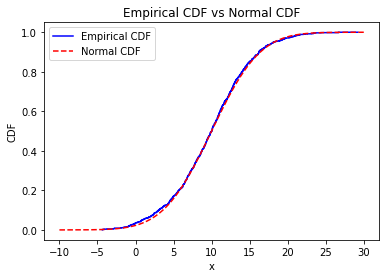

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm

# Box-Muller Transform
def box_muller_transform(u1, u2):
    """
    Generate two independent standard normal random variables using Box-Muller transform.
    """
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z1, z2

def generate_normal_samples(n_samples, mu, sigma):
    """
    Generate samples from N(mu, sigma^2) using the Box-Muller method.
    """
    # Generate uniform random variables
    u1 = np.random.uniform(0, 1, n_samples // 2)
    u2 = np.random.uniform(0, 1, n_samples // 2)
    
    # Apply Box-Muller transform
    z1, z2 = box_muller_transform(u1, u2)
    
    # Scale and shift to N(mu, sigma^2)
    samples = np.concatenate([z1, z2]) * sigma + mu
    return samples

# Generate samples
mu, sigma = 10, 5
n_samples = 1000
samples = generate_normal_samples(n_samples, mu, sigma)

# Kolmogorov-Smirnov Test
# Compare the empirical distribution to the normal distribution
D_n, p_value = kstest(samples, lambda x: norm.cdf(x, loc=mu, scale=sigma))

# DKW Test (Note: Assumptions may not strictly hold)
alpha = 0.05
epsilon_alpha = np.sqrt(-np.log(alpha / 2) / (2 * n_samples))
print(f"Kolmogorov-Smirnov statistic D_n: {D_n}")
print(f"Critical value (epsilon_alpha): {epsilon_alpha}")
print(f"Does the generator pass the DKW test? {'Yes' if D_n <= epsilon_alpha else 'No'}")

# Plot the ECDF and the normal CDF
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x, y = ecdf(samples)
x_theoretical = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
cdf_theoretical = norm.cdf(x_theoretical, loc=mu, scale=sigma)

plt.step(x, y, label="Empirical CDF", color="blue")
plt.plot(x_theoretical, cdf_theoretical, label="Normal CDF", color="red", linestyle="--")
plt.title("Empirical CDF vs Normal CDF")
plt.xlabel("x")
plt.ylabel("CDF")
plt.legend()
plt.show()


Exercise 3: Consider the continuous distribution with density $$p(x)= (1/2)cos(x), −π2 <x< π2$$.
• Plot the distribution function F(x).
• Find the inverse distribution function F−1.
• Implement an inversion sampler to sample from F.
• Implement an Accept-Reject Sampler, Algorithm 1 with sampling den- sity Uniform([ − π/2, π/2]). On average, how many samples get rejected?

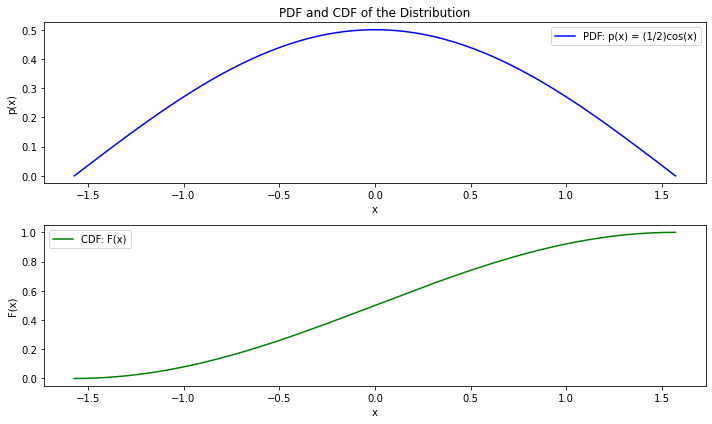

Number of samples rejected (accept-reject): 5814
Rejection rate: 0.37


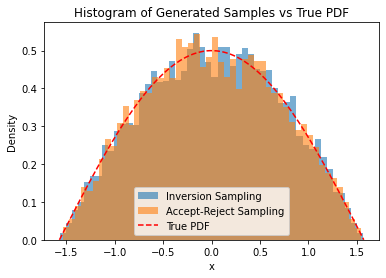

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PDF and CDF
def p(x):
    """Probability density function."""
    return 0.5 * np.cos(x) if -np.pi/2 < x < np.pi/2 else 0

def F(x):
    """Cumulative distribution function."""
    return 0.5 * (np.sin(x) + 1)

def F_inv(y):
    """Inverse CDF."""
    return np.arcsin(2 * y - 1)

# Inversion Sampler
def inversion_sampler(n_samples):
    """Sample from the distribution using the inverse CDF."""
    U = np.random.uniform(0, 1, n_samples)
    return F_inv(U)

# Accept-Reject Sampler
def accept_reject_sampler(n_samples):
    """Sample from the distribution using accept-reject sampling."""
    accepted = []
    rejected = 0
    while len(accepted) < n_samples:
        # Propose x from Uniform(-pi/2, pi/2)
        x = np.random.uniform(-np.pi/2, np.pi/2)
        # Compute acceptance ratio r(x)
        r = np.cos(x)
        U = np.random.uniform(0, 1)
        if U <= r:  # Accept
            accepted.append(x)
        else:  # Reject
            rejected += 1
    return accepted, rejected

# Plot the PDF and CDF
x_vals = np.linspace(-np.pi/2, np.pi/2, 1000)
pdf_vals = [p(x) for x in x_vals]
cdf_vals = [F(x) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x_vals, pdf_vals, label="PDF: p(x) = (1/2)cos(x)", color="blue")
plt.title("PDF and CDF of the Distribution")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x_vals, cdf_vals, label="CDF: F(x)", color="green")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.tight_layout()
plt.show()

# Generate samples and compare
n_samples = 10000

# Inversion sampling
inversion_samples = inversion_sampler(n_samples)

# Accept-reject sampling
ar_samples, n_rejected = accept_reject_sampler(n_samples)

print(f"Number of samples rejected (accept-reject): {n_rejected}")
print(f"Rejection rate: {n_rejected / (n_samples + n_rejected):.2f}")

# Compare histograms
plt.hist(inversion_samples, bins=50, density=True, alpha=0.6, label="Inversion Sampling")
plt.hist(ar_samples, bins=50, density=True, alpha=0.6, label="Accept-Reject Sampling")
plt.plot(x_vals, pdf_vals, label="True PDF", color="red", linestyle="--")
plt.title("Histogram of Generated Samples vs True PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()
